# Exercise: Polynomial Regression and Hyperparameters

Polynomial Regression is a technique that allows us to work with data when the relationship between inputs and results is more complex, and cannot be adequatelly expressed by the Linear Models we have used thus far.

Hyperparameters are variables that influence how a model performs and can use them fine tune models to train faster, or to improve precision.

We are going to build different Polynomial Regression models and make comparisons based on the choice of hyperparameters.

## Preparing data
In this unit we are using fictional investment banking dataset, and will correlate the amount of money accrued against to the age of accounts.



In [1]:
# Import everything we will need for this unit
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('Data/investments.csv', index_col=False, sep=",", header=0)

# Check what's in the dataset
dataset.head()


,Account ID,Account Age,Total Accrued
0,106440e8-775d-4357-8485-d3923036b6c1,48,41239
1,b2c6c687-9c1a-4171-86d2-3ccf3759931d,12,920
2,db5f9ba8-0b3c-4fed-87fd-665bb273cbda,43,27851
3,73aa1fe8-dece-4aa5-a763-ddee06ef5aab,25,4304
4,213b5e44-60ce-447a-b7c3-12b465828af8,31,12805


Let's do a brief data exploration.

This dataset has three columns:

- `Account ID`: Unique identifiers for each Account
- `Account Age`: Number off years an account has been open
- `Total Accrued`: Amount of money accrued for an account

Plotting the data reveals more information:

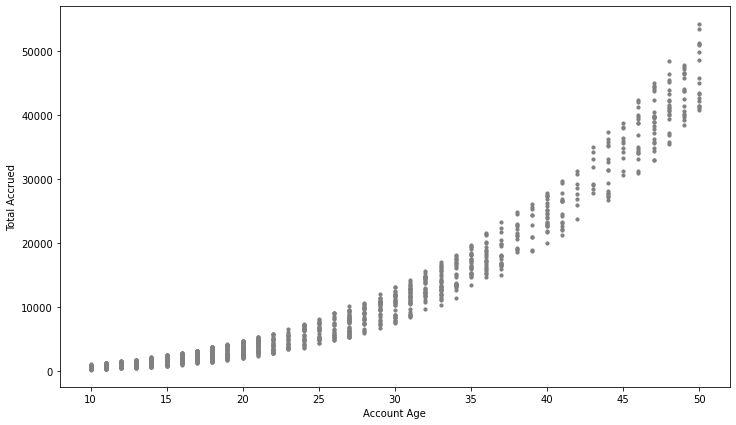

In [2]:
# Plot dataset points
X = dataset["Account Age"]
y = dataset["Total Accrued"]

%matplotlib inline
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
plt.ylabel('Total Accrued')
plt.xlabel("Account Age")
plt.show()

We can gather some insights from the plot above:

- Older accounts **tend** to have larger amounts accrued

- Older accounts show a much wider variation in accrued funds than newer accounts

- Results are not linear; they tend to increase _exponentially_ over time

The last point is especially important. It tells us that we should not use a simple Linear Regression model, even though at first glance our dataset looks very simple. Why? A straight line is not a good representation of the data; we clearly need a line that is curved!

## Polynomial Regression

_Polynomial Regression_ is a form of regression analysis that fits curved lines to data, rather than the simple straight lines seen in simple Linear Regression. The equations of these lines are called _polynomial equations_, the simplest curved polynomial equation being a quadratic:

y = a<sub>2</sub>x<sup>2</sup> + a<sub>1</sub>x + a<sub>0</sub>

which we will try to fit to our data here.

Creating a Polynomial Regression model requires the extra step of adding more features (called _polynomial features_) to the dataset, so the algorithm can "learn" that the results are best described by a curve instead of a straight line.

We can do this using sklearn's `PolynomialFeatures` (to create the new features) and `LinearRegression` (to perform the regression):


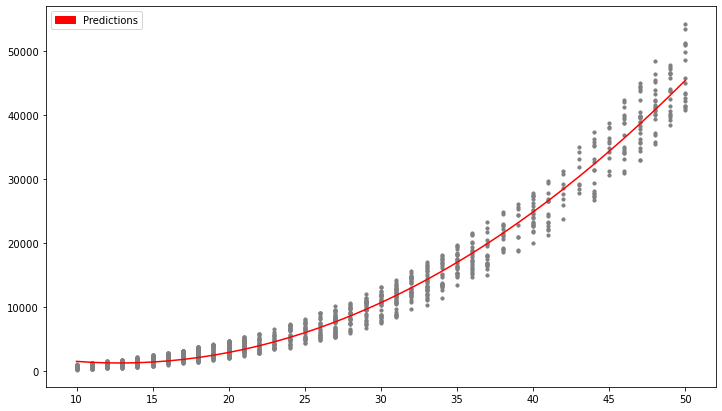

In [3]:
# X and y have to be two-dimentional matrices
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

# Create a matrix of polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Instantiate model
model = LinearRegression()

# Use the polynomial feature matrix, not the original one.
model.fit(X_poly, y)
y_hat = model.predict(X_poly)

# Plot predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat), key=sort_axis)
X, y_hat = zip(*sorted_zip)
plt.plot(X, y_hat, color="red")
# Add legend
red_patch = mpatches.Patch(color="red", label="Predictions")
plt.legend(handles=[red_patch])
plt.show()

As seen above, the results are predicted by a curved line the closely follows the shape of the datapoints.

## Metrics
Although plots can give us a visual indication of how a model is performing, we can and should use different **metrics** to more precisely evaluate them.

Metrics will give us numbers that can be used to compare:

- The results of using different algorithms to train the same dataset
- How using different **datasets** to train the same model influence the results
- How changes in hyperparameters in a given model influence its results

Some of the most common metrics applied to regression models are:

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (R2)

### Mean Squared Error (MSE)
It measures the mean numeric difference between the predictions and actual values.
This difference is squared, so the values are absolute and large errors are penalized.

This is the most common metric used in regression tasks.

### Root Mean Squared Error (RMSE)
As the name suggests, this is squared root of the MSE.

Unlike the MSE, the RMSE is in the same unit as the values we are trying to predict, making the evaluation more intuitive.


### R-squared (R<sup>2</sup>)
It measures how well the predictions match the actual datapoints, represented by the proportion in variation in the results.

The R<sup>2</sup> score varies between 0 (0%) and 1 (100%) and a R<sup>2</sup> score of 1 indicates that the all predicted points match the actual values expected.

Usually, the higher the R2 score, the better the model is performing but a low R2 score is not necessarily a bad result , and should be used to compare different implementations with the same dataset.

We will use the RMSE and R<sup>2</sup> metrics to evaluate the model above and make comparisons:


In [4]:
# metrics
rmse = np.sqrt(mean_squared_error(y,y_hat))
r2 = r2_score(y,y_hat)
original_rmse, original_r2 = rmse, r2
print(f"RMSE metrics: {rmse}")
print(f"R2 metrics: {r2}")

RMSE metrics: 18092.197609734827
R2 metrics: -1.2435126017064988


## Hyperparameters

Hyperparameters are variables set in a model **before training** that will govern its complexity and the way it performs.

They are different from model **parameters**, which are learned from the data (like "weights", for example).

The most common hyperparameters used in Linear Regression with Gradient Descent are the _Learning Rate_ (sometimes represented as "alpha") and the _Number of Iterations_.

### Learning Rate
The value that determines the "step size" taken in each iteration when minimizing the cost function (we will take a deeper look at this in the next Unit).

### Number of Iterations
Refers to the number of times the model goes through the training data and updates its parameters. The exact meaning is dependent on the context and algorith used - some algorithms will use the entire dataset in one iteration, where others will use only parts of it to calculate updates.


Every hyperparameter has trade-offs that we need to be aware of:

* A high number of iterations **usually** brings better results, but also increases the time it takes to train a model.
* A lower number of iterations means quicker training times, but may not be enough for the model to learn enough about data.

In the following exercises we will use a custom implementation of Polynomial Linear Regression that lets us set the hyperparameters. We will then compare the results to the previous model and see if **tuning** hyperparams can improve performance.


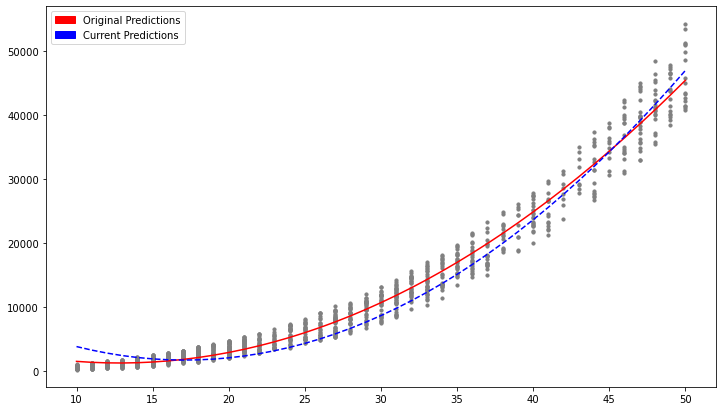

In [5]:

# Use a custom Polynomial Linear Regression implementation
# so we can set hyperparameters. This implementation does not
# appear in this notebook because you do not need to
# fully understand its details to achieve this Unit's
# learning objectives 
import PolynomialLinearRegression as plr

X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

# Initialize and train model
# setting values for learning rate and number of iterations
custom_model = plr.PolynomialLinearRegression()
weights2, J_history2 = custom_model.fit(X, y, learning_rate=0.01, num_iters=300)

# Generate predictions based on original dataset
y_hat2 = custom_model.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_hat2), key=sort_axis)
X, y_hat2 = zip(*sorted_zip)
l1 = plt.plot(X, y_hat, color="red")
l2 = plt.plot(X, y_hat2, "--", color="blue")
# Add legend
red_patch = mpatches.Patch(color="red", label="Original Predictions")
blue_patch = mpatches.Patch(color="blue", label="Current Predictions")
plt.legend(handles=[red_patch, blue_patch])
plt.show()


The dashed line above shows that out custom model could do better, especially compared to the original predictions using sklearn's `LinearModel`.

This was expected since we used such a low value for the `num_iter` hyperparam, setting it to only 300 iterations, while `LinearModel` does its best to optimize results. 

Training time is reduced that way, but the model needs more iterations to learn and get a better fit.

To illustrate, let's plot the relationship between the cost and the number of iterations:


Text(0, 0.5, 'Cost')

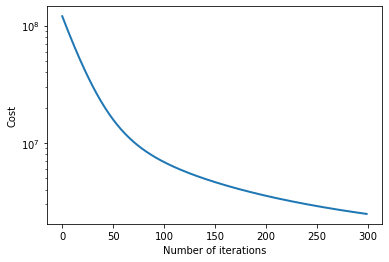

In [6]:
# Plot cost x Number of iterations
# Use logarithmic scale since y varies so much
plt.yscale("log")
plt.plot(np.arange(len(J_history2)), J_history2, lw=2)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

The plot above clearly shows that more iterations lower the cost, and that perhaps 300 iterations is not enough for an optimal result.

What happens if we train it using `1000` iterations?

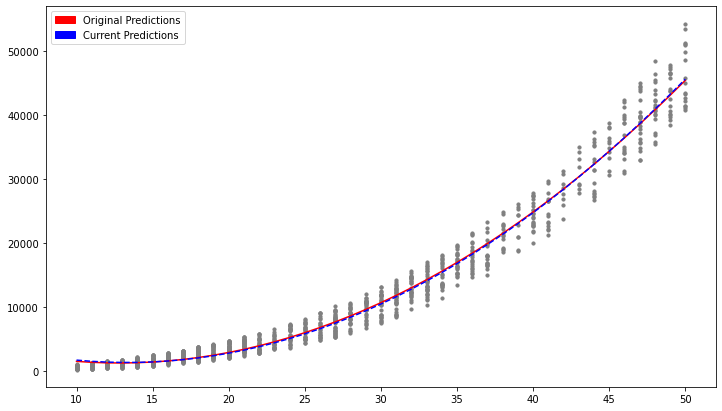

In [7]:
# retrain model, using 1000 iterations

# reset X and y
X = dataset["Account Age"].values.reshape(-1,1)
y = dataset["Total Accrued"].values

weights3, J_history3 = custom_model.fit(X, y, learning_rate=0.01, num_iters=1000)

# Generate predictions based on original dataset
y_hat3 = custom_model.predict(X)

# Plot previous and new predictions over datapoints
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(7)
plt.scatter(X, y, s=10, color="gray")
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X, y_hat3), key=sort_axis)
X, y_hat3 = zip(*sorted_zip)
l1 = plt.plot(X, y_hat, color="red")
l2 = plt.plot(X, y_hat3, "--", color="blue")
# Add legend
red_patch = mpatches.Patch(color="red", label="Original Predictions")
blue_patch = mpatches.Patch(color="blue", label="Current Predictions")
plt.legend(handles=[red_patch, blue_patch])
plt.show()

Visually, we now have a near perfect fit to the original model, proving that the higher number of iterations improved the model's perfomance.

Let's check the metrics:

In [8]:
# metrics
rmse = np.sqrt(mean_squared_error(y, y_hat3))
r2 = r2_score(y, y_hat3)
print(f"RMSE metrics: {rmse}")
print(f"R2 metrics: {r2}")

RMSE metrics: 18095.09199139911
R2 metrics: -1.2442304914066002


In [9]:
# Use a dataframe to create a comparison table of metrics
l = [["Original Model", original_rmse, original_r2],
    ["Custom Model", rmse, r2]]

pd.DataFrame(l, columns=["", "RMSE", "R2"])

,,RMSE,R2
0,Original Model,18092.197610,-1.243513
1,Custom Model,18095.091991,-1.244230


Indeed, metrics for both models are very close now.

Let's plot the cost function over the higher number of iterations:

Text(0, 0.5, 'Cost')

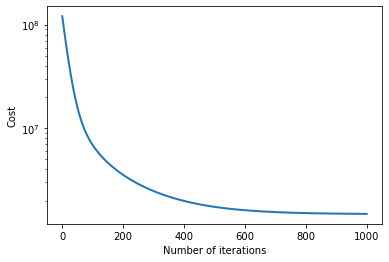

In [10]:
# Plot cost x Number of iterations
# Use logarithmic scale since y varies so much
plt.yscale("log")
plt.plot(np.arange(len(J_history3)), J_history3, lw=2)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")

The plot shows us that, indeed, 300 iterations was not enough.

The cost is reduced steadily up until around 800 iterations, and if we stopped training at that mark the metrics would probably be very close to what we got.

## Summary

In this exercise you learned about how Polynomial Linear Regression can be used when the relationship between variables is described by a curve.

We talked about the importance of gathering metrics to evaluate and compare models, and described some of the alternatives to use with Linear Regression models: RMSE and R2.

We then explained what hyperparemeters are and showed how they can be tuned to change the way a model behaves and improve its performance.
